In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [4]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [5]:
#Merging Dataframes
movies = movies.merge(credits, on='title')

In [6]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [8]:
#Dropping Columns
#Choosing columns to keep
movies = movies[['genres','id','keywords','title','overview','cast','crew']]

In [9]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [10]:
#missing data
movies.isnull().sum()

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace=True)

In [12]:
movies.isnull().sum()
#checking for null values

genres      0
id          0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [13]:
#Duplicate Values
movies.duplicated().sum()

0

In [14]:
#Data Cleaning
#Goal is to create tags for each entity to map it in recommendation system
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
#since genres is in unusable format, we will make a list of genres
#Extracting Genres from list of dictionary
import ast
#ast module will convert string into list and then loop can be applied

def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [16]:
#fitting function to the data

movies['genres'] = movies['genres'].apply(convert)

In [17]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [18]:
#Making list of keywords using same function
movies['keywords'] = movies['keywords'].apply(convert)

In [19]:
movies.head(1)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [20]:
#Now we extract Actual names of top 3 actors from the dictionary of whole cast
#using same function with rank 3


def convert3(obj):
    L = []
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter +=1
        else:
            break
    return L

In [21]:
movies['cast']=movies['cast'].apply(convert3)
movies['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [22]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [23]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [24]:
#now we need to extract Director names form dictionary where job is Director

def fetch_dir(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [25]:
movies['crew'] = movies['crew'].apply(fetch_dir)

In [26]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [27]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [28]:
#since ['Overview']is a string we will convert it into a list to add to other list using lambda function
#Here we have the overview in list format

movies['overview']= movies['overview'].apply(lambda x:x.split())

In [29]:
movies.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [30]:
#Since diffrent people can have same first or last names thus this can cause issues during search options thus we remove spaces and make each full name unique to have unique identity of a person
#replacing spaces by nothing
movies['genres']=movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])
#movies['genres']

In [31]:
movies['keywords'] =  movies['keywords'].apply(lambda x :[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x : [i.replace(" ","") for i in x])
movies['crew']= movies['crew'].apply(lambda x : [i.replace(" ","") for i in x])
movies.head(3)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [32]:
#Making a new column "Tags" where all the data will be concatinated for search option

movies['tags'] = movies['genres']+ movies['cast']+ movies['crew']+ movies['keywords']+ movies['overview']
movies.head(3)

,genres,id,keywords,title,overview,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, S..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Adventure, Fantasy, Action, JohnnyDepp, Orlan..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[Action, Adventure, Crime, DanielCraig, Christ..."


In [33]:
# making new dataframe with just tags in it

new_df = movies[['id','title','tags']]
new_df.head()

,id,title,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction, S..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action, JohnnyDepp, Orlan..."
2,206647,Spectre,"[Action, Adventure, Crime, DanielCraig, Christ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller, ChristianBale..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction, TaylorKits..."


In [34]:
#now Converting list back into string 
#joining each list at space to make it all a long string

new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\PRANSH~1\AppData\Local\Temp/ipykernel_8008/1961312354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [35]:
new_df['tags'][0]

'Action Adventure Fantasy ScienceFiction SamWorthington ZoeSaldana SigourneyWeaver JamesCameron cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [36]:
#converting it all in lowercase for ease in model 

new_df ['tags'] = new_df ['tags'].apply(lambda x:x.lower())

C:\Users\PRANSH~1\AppData\Local\Temp/ipykernel_8008/831529217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df ['tags'] = new_df ['tags'].apply(lambda x:x.lower())


In [37]:
new_df.head(3)

,id,title,tags
0,19995,Avatar,action adventure fantasy sciencefiction samwor...
1,285,Pirates of the Caribbean: At World's End,adventure fantasy action johnnydepp orlandoblo...
2,206647,Spectre,action adventure crime danielcraig christophwa...


#### Now we will convert each element of a tag into a vector and once we have it, we will calculate the recommendation based on vectors closest to each entry

#### This technique is known as TEXT VECTORISATION using bag of words 

In bag of words, we combine all the elements of each tag and concatinate it to a list.
Then we  calculate most frequent words and extract most frequent words
then for each element we calculate the frequency of each most common word and this will convert each entry in a vector format 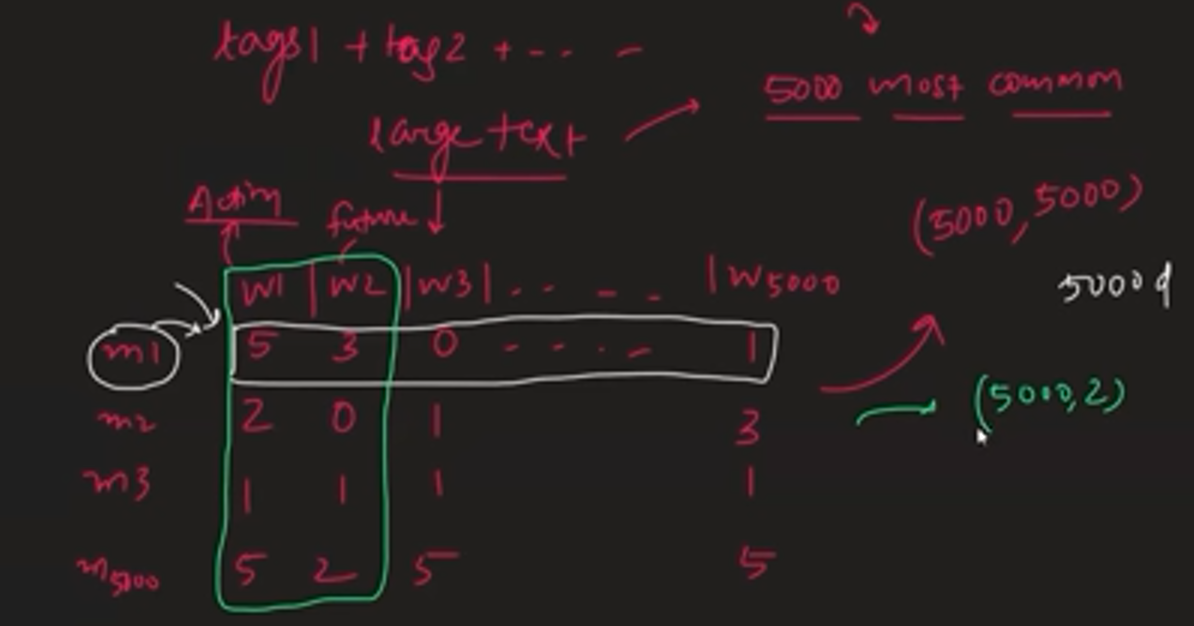


here M1 ,m2 .. are vectors made from most frequent words.
Every movie is vector with 'n' dimensional space, where n is no. of most frequent words chosen by us.
NOTE : Try making solution with least amount of words to reduce dimensionality.

Also we'll discard all stop words in it, words used with no actual meaning in sentence. (a , is, the, will etc.)

### We will use Scikit learn (Count Vectoriser class)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words ='english')

In [39]:
vectors = cv.fit_transform(new_df['tags']).toarray()

In [40]:
vectors.shape

(4806, 5000)

In [41]:
# we can check all the features in 5000 elemets we vectorised

cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930s',
 '1940s',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2009',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 '70s',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adams',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addicted',
 'addiction',
 'adolescence',
 'adolescent'

In [42]:
#issue here is similar words are repeated hence we use stemming for resolving this issue using nltk
# love loved loving lover will be same as love
import nltk

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [44]:
def stem(text):
    y= []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [45]:
new_df['tags'] = new_df['tags'].apply(stem)
new_df.head()

C:\Users\PRANSH~1\AppData\Local\Temp/ipykernel_8008/2811961144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


,id,title,tags
0,19995,Avatar,action adventur fantasi sciencefict samworthin...
1,285,Pirates of the Caribbean: At World's End,adventur fantasi action johnnydepp orlandobloo...
2,206647,Spectre,action adventur crime danielcraig christophwal...
3,49026,The Dark Knight Rises,action crime drama thriller christianbal micha...
4,49529,John Carter,action adventur sciencefict taylorkitsch lynnc...


### Now making the text vectors again 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, stop_words ='english')

vectors = cv.fit_transform(new_df['tags']).toarray()

cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

#### Now to check similarities between each vector we will calculate distance between them

With increase in dimensions we wont use Eucledian distance instead we calculate the angles beween them using Cosine Distance.(Angle beteen them)

In [47]:
#we use Sklearn to calculte cosine distance

from sklearn.metrics.pairwise import cosine_similarity as cs

In [48]:
similarity= cs(vectors)
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

#### Now we make a function that takes input and give names of 5 similar movies

In [49]:
#fetching index of each movie
index = new_df[new_df['title']== 'Batman Begins'].index[0]
index

119

In [50]:
#cehcking similarity of diffrent elememts {0}= first  mmovie
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [51]:
#Sorting of movies on basis of distances by holding index position using enumerate function
list(enumerate(similarity[0]))


[(0, 0.9999999999999998),
 (1, 0.08346223261119858),
 (2, 0.08603090020146066),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17316974359835272),


In [52]:
sorted(list(enumerate(similarity[0])), reverse =True)

[(4805, 0.0),
 (4804, 0.0),
 (4803, 0.04499212706658476),
 (4802, 0.046829290579084706),
 (4801, 0.019252140716412975),
 (4800, 0.0),
 (4799, 0.052631578947368425),
 (4798, 0.04223886030955117),
 (4797, 0.0),
 (4796, 0.0),
 (4795, 0.0),
 (4794, 0.0),
 (4793, 0.05407380704358751),
 (4792, 0.0),
 (4791, 0.0),
 (4790, 0.0582716546748065),
 (4789, 0.060833032924035954),
 (4788, 0.0),
 (4787, 0.019672236884115842),
 (4786, 0.0),
 (4785, 0.019672236884115842),
 (4784, 0.043355498476206004),
 (4783, 0.0),
 (4782, 0.025649458802128853),
 (4781, 0.0582716546748065),
 (4780, 0.0),
 (4779, 0.0),
 (4778, 0.0),
 (4777, 0.10814761408717502),
 (4776, 0.0),
 (4775, 0.05647824947249051),
 (4774, 0.0),
 (4773, 0.029617443887954616),
 (4772, 0.023918243661746996),
 (4771, 0.039344473768231684),
 (4770, 0.0),
 (4769, 0.0),
 (4768, 0.0),
 (4767, 0.03627381250550058),
 (4766, 0.017195436249022724),
 (4765, 0.0),
 (4764, 0.0),
 (4763, 0.0),
 (4762, 0.0),
 (4761, 0.02742042485535409),
 (4760, 0.02533472959690

In [53]:
#sotring happened on basis of index we need to change it
#lambda function to tell that sorting is to be done on 2nd number
sorted(list(enumerate(similarity[0])), reverse =True, key =lambda x:x[1])[1:8]

[(1216, 0.2867696673382022),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574),
 (582, 0.24511108480187255),
 (1204, 0.24455799402225922)]

In [54]:
def recom (movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse = True, key= lambda x:x[1])[1:8]
    
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [55]:
recom('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.
Battle: Los Angeles
Predators


In [56]:
recom('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf
Rockaway
Batman v Superman: Dawn of Justice
